# **Regularization**

## **L1 L2 Regularization**

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
class LogisticRegression(nn.Module):
  def __init__ (self, x_in, x_out):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(x_in, x_out)
    self.activation = nn.Sigmoid()
  def forward(self, x):
    z = self.linear(x)
    a = self.activation(z)
    return a

In [ ]:
model = LogisticRegression(2,1).train()

In [ ]:
for name, param in model.named_parameters():
  print('=========================')
  print(name)
  print(param.shape)
  print(param)

linear.weight
torch.Size([1, 2])
Parameter containing:
tensor([[ 0.5790, -0.6277]], requires_grad=True)
linear.bias
torch.Size([1])
Parameter containing:
tensor([0.2683], requires_grad=True)


**L1 loss in LogisticRegression**


> reg = model.linear.weight.abs().sum()



In [ ]:
print(model.linear.weight)
print(model.linear.weight.abs().sum())

Parameter containing:
tensor([[ 0.5790, -0.6277]], requires_grad=True)
tensor(1.2067, grad_fn=<SumBackward0>)


**L2 loss in LogisticRegression**
> reg = model.linear.weight.pow(2.0).sum()

In [ ]:
print(model.linear.weight)
print(model.linear.weight.pow(2.0).sum())

Parameter containing:
tensor([[ 0.5790, -0.6277]], requires_grad=True)
tensor(0.7292, grad_fn=<SumBackward0>)


## **Cifar-10**

In [ ]:
# Image Data in Simple Neural Network

img = torch.FloatTensor([[[.392,.482,.576],[.478,.639,.241],[.580,.790,.543]],
                         [[.169,.263,.376],[.263,.442,.823],[.373,.602,.165]],
                         [[.306,.376,.451],[.376,.478,.561],[.443,.569,.674]]])

In [ ]:
print(img.shape)
new_img = img.view(3*3*3)
print(new_img.shape)
print(new_img)
print(new_img[3*3*3-3:3*3*3])
print(img[2,2,:])

In [1]:
import torchvision
import torchvision.transforms as transforms

train_dataset = torchvision.datasets.CIFAR10(root="CIFAR10/",
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root="CIFAR10/",
                                            train=False,
                                            transform=transforms.ToTensor(),
                                            download=True)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting CIFAR10/cifar-10-python.tar.gz to CIFAR10/
Files already downloaded and verified


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
# fix value of Random Seed
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.cuda.manual_seed_all(0)

In [4]:
if torch.cuda.is_available():
  device = torch.device('cuda')
else:
  device = torch.device('cpu')

In [5]:
batch_size = 128

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)

In [6]:
class Model(nn.Module):
  def __init__(self, drop_prob):
    super(Model, self).__init__()
    self.linear1 = nn.Linear(32*32*3, 256)  # Dataset (input size: 32*32*3, output size: 10)
    self.linear2 = nn.Linear(256,128)
    self.linear3 = nn.Linear(128, 10)
    self.dropout = nn.Dropout(drop_prob)

    self.activation = nn.Sigmoid()

    self.bn1 = nn.BatchNorm1d(256)
    self.bn2 = nn.BatchNorm1d(128)
  
  def forward(self, x):
    z1 = self.linear1(x)
    z1 = self.bn1(z1)
    a1 = self.activation(z1)
    a1 = self.dropout(a1)

    z2 = self.linear2(a1)
    z2 = self.bn2(z2)
    a2 = self.activation(z2)
    a2 = self.dropout(a2)

    z3 = self.linear3(a2)

    return z3

In [8]:
model = Model(0.1).to(device).train()

In [9]:
optimizer = optim.SGD(model.parameters(), lr=1) # set optimizer

In [10]:
criterion = nn.CrossEntropyLoss()

In [ ]:
epochs = 70
lmbd = 0.003 

train_avg_costs = []
test_avg_costs = []

test_total_batch = len(test_dataloader)
total_batch_num = len(train_dataloader)

for epoch in range(epochs):
  avg_cost = 0
  model.train()
  for b_x, b_y in train_dataloader:
    b_x = b_x.view(-1, 32*32*3).to(device)
    logits = model(b_x) # forward propagation
    loss = criterion(logits, b_y.to(device)) # get cost

    # L2 regularization
    #reg = model.linear1.weight.pow(2.0).sum()
    #reg += model.linear2.weight.pow(2.0).sum()
    #reg += model.linear3.weight.pow(2.0).sum()
    #loss += lmbd * reg / len(b_x) / 2.

    optimizer.zero_grad()
    loss.backward() # backward propagation
    optimizer.step() # update parameters

    avg_cost += loss / total_batch_num
  train_avg_costs.append(avg_cost.detach())
  print('Epoch : {} / {}, cost : {}'.format(epoch+1, epochs, avg_cost))

  test_avg_cost=0
  model.eval()
  for b_x, b_y in test_dataloader:
    b_x = b_x.view(-1, 32*32*3).to(device)
    with torch.no_grad():
      logits = model(b_x)
      test_loss = criterion(logits, b_y.to(device)) # get cost
    test_avg_cost += test_loss / test_total_batch
  
  test_avg_costs.append(test_avg_cost.detach())


Epoch : 1 / 70, cost : 2.2098042964935303
Epoch : 2 / 70, cost : 1.7677781581878662
Epoch : 3 / 70, cost : 1.6740682125091553
Epoch : 4 / 70, cost : 1.6060664653778076
Epoch : 5 / 70, cost : 1.5504728555679321
Epoch : 6 / 70, cost : 1.5077704191207886
Epoch : 7 / 70, cost : 1.4672973155975342
Epoch : 8 / 70, cost : 1.4358313083648682
Epoch : 9 / 70, cost : 1.4059202671051025
Epoch : 10 / 70, cost : 1.376792550086975
Epoch : 11 / 70, cost : 1.352439284324646
Epoch : 12 / 70, cost : 1.3283755779266357
Epoch : 13 / 70, cost : 1.3060309886932373
Epoch : 14 / 70, cost : 1.2806702852249146
Epoch : 15 / 70, cost : 1.2606507539749146
Epoch : 16 / 70, cost : 1.2354806661605835
Epoch : 17 / 70, cost : 1.2155160903930664
Epoch : 18 / 70, cost : 1.1935362815856934
Epoch : 19 / 70, cost : 1.1721506118774414
Epoch : 20 / 70, cost : 1.1538519859313965
Epoch : 21 / 70, cost : 1.1326969861984253
Epoch : 22 / 70, cost : 1.1146186590194702
Epoch : 23 / 70, cost : 1.091246485710144
Epoch : 24 / 70, cost :

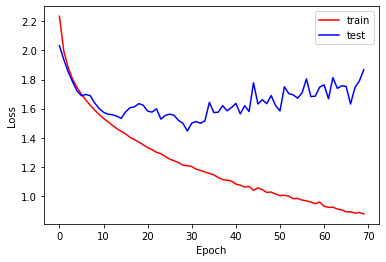

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
epoch = range(epochs)
plt.plot(epoch,train_avg_costs, 'r-')
plt.plot(epoch,test_avg_costs, 'b-')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train', 'test'])
plt.show()

## **Dropout**

In [ ]:
class Model(nn.Module):
  def __init__(self, drop_prob):
    super(Model, self).__init__()
    self.linear1 = nn.Linear(32*32*3, 256)
    self.linear2 = nn.Linear(256, 128)
    self.linear3 = nn.Linear(128, 10)

    self.dropout = nn.Dropout(drop_prob)
    self.activation = nn.Sigmoid()
  
  def forward(self, x):
    z1 = self.linear1(x)
    a1 = self.activation(z1)
    a1 = self.dropout(a1)

    z2 = self.linear2(a1)
    a2 = self.activation(z2)
    a2 = self.dropout(a2)

    z3 = self.linear3(a2)

    return z3

In [ ]:
model = Model(0.1).to(device).train()

## **Normalization**

In [ ]:
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261))])

train_dataset = torchvision.datasets.CIFAR10(root="CIFAR10/",
                                             train=True,
                                             transform=transforms.ToTensor(),
                                             download=True)

test_dataset = torchvision.datasets.CIFAR10(root="CIFAR10/",
                                            train=False,
                                            transform=transforms.ToTensor(),
                                            download=True)

Files already downloaded and verified
Files already downloaded and verified
